In [2]:
import requests 
from bs4 import BeautifulSoup

url_genre = "https://www.metacritic.com/browse/movies/genre/metascore/action"
headers = {'User-Agent': 'Mozilla/5.0'}

html = requests.get(url_genre, headers=headers) ##requests 를 이용해서 url의 html 파일을 가져옴
soup = BeautifulSoup(html.text, "html.parser") ##가져온 html 파일을 html parser를 통해서 정리

# request : 서버 측에 데이터를 요청하는데에 쓰일 패키지
# BeautifulSoup : 웹 크롤링 관련 패키지
# url : 크롤링할 주소

In [3]:
## movie genre list 이용하여 movie list 뽑아내는 루틴

#실제 사용할 데이터
#multi_genre_list = ['action', 'adventure', ' animation', 'biograpy', 'comedy', 'crime', 'documentary', 'drama', 'family', 'fantasy', 'film-noir', 'history', 'horror', 'music', 'musical', 'mystery', 'news','reality-tv', 'romance', 'sci-fi', 'short', 'sport', 'thriller', 'war', 'western']

#multi_genre_list = ['action', 'biography', 'comedy', 'reality-tv']

multi_genre_list = ['reaility-tv', 'action']  
movie_list = []

for i in multi_genre_list:
    url = "https://www.metacritic.com/browse/movies/genre/metascore/" + i
    
    html = requests.get(url, headers=headers)
    soup = BeautifulSoup(html.text, "html.parser")
    
    #print(soup)
    
    #movie_list = list()
    html_movie_list = soup.findAll("a", attrs={"class":"title"})
    
    # 영화 제목안에 있는 기호들에 대해 검색 URL에 맞게 치환하는 작업
    for line in html_movie_list:
        text = line.get_text()
        text = text.replace(" (", "-")
        text = text.replace(": ", "-")
        text = text.replace(")", "")
        text = text.replace(", ","-")
        text = text.replace(" ", "-")
        text = text.lower()
        movie_list.append(text)
        

In [4]:
movie_list

['north-by-northwest',
 'seven-samurai-re-release',
 'metropolis-re-release',
 'the-wild-bunch',
 'the-adventures-of-robin-hood-re-release',
 'dragon-inn-1967',
 'ran',
 'the-hurt-locker',
 'zero-dark-thirty',
 'dunkirk',
 'apocalypse-now',
 'the-lord-of-the-rings-the-return-of-the-king',
 'the-french-connection',
 'crouching-tiger-hidden-dragon',
 'rio-bravo',
 'apocalypse-now-redux',
 'the-lord-of-the-rings-the-fellowship-of-the-ring',
 'saving-private-ryan',
 'the-incredibles',
 'dirty-harry',
 'mad-max-fury-road',
 'star-wars-episode-iv---a-new-hope',
 'house-of-flying-daggers',
 'assault-on-precinct-13',
 'gangs-of-wasseypur',
 'high-noon',
 'black-panther',
 'the-lord-of-the-rings-the-two-towers',
 'the-fugitive',
 'goldfinger',
 'north-by-northwest',
 'seven-samurai-re-release',
 'metropolis-re-release',
 'the-wild-bunch',
 'the-adventures-of-robin-hood-re-release',
 'dragon-inn-1967',
 'ran',
 'the-hurt-locker',
 'zero-dark-thirty',
 'dunkirk',
 'apocalypse-now',
 'the-lord-of-

In [5]:
## URL에서 크롤링을 하여 영화배우와 영화별 장르 추출

movie_genre = []
actor = []
movie = []

num=0

for idx, i in enumerate(movie_list):
    
    
    url = "https://www.metacritic.com/movie/" + i + '/details'
    
    html = requests.get(url, headers=headers) ##requests 를 이용해서 url의 html 파일을 가져옴
    soup = BeautifulSoup(html.text, "html.parser")
    
    movie.append([])
    movie[idx].append(i)
    
    #actor.append([])
    #actor[idx].append(i)
    
    html_movie_genre = soup.find("tr", attrs={"class":"genres"})
    html_movie_actor = soup.findAll("table", attrs={"class":"credits"})
    
    for line in html_movie_genre.find_all("span"):
        text = line.get_text()
        text = text.replace("\n","")
        text = text.replace(" ","")
        movie_genre.append(text)
        movie[idx].append(text)
        
        
    for index, line in enumerate(html_movie_actor[2].find_all("td",attrs={"class":"person"})):
        text = line.get_text()
        text = text.replace(" ","")
        text = text.replace("\n","")
        #actor.append(text)
        
        actor.append([])
        actor[num].append(text)
        actor[num].append(i)
 
        num = num + 1
        

In [6]:
movie

[['north-by-northwest', 'Action', 'Adventure', 'Mystery', 'Thriller'],
 ['seven-samurai-re-release', 'Action', 'Adventure', 'Drama'],
 ['metropolis-re-release',
  'Action',
  'Adventure',
  'Sci-Fi',
  'Drama',
  'Thriller',
  'Fantasy',
  'Romance'],
 ['the-wild-bunch', 'Action', 'Adventure', 'Western'],
 ['the-adventures-of-robin-hood-re-release', 'Action', 'Adventure', 'Romance'],
 ['dragon-inn-1967', 'Action', 'Adventure'],
 ['ran', 'Action', 'Drama', 'War'],
 ['the-hurt-locker', 'Action', 'Drama', 'Thriller', 'War'],
 ['zero-dark-thirty', 'Action', 'Drama', 'History', 'Thriller'],
 ['dunkirk', 'Action', 'Drama', 'History', 'Thriller', 'War'],
 ['apocalypse-now', 'Action', 'Drama', 'War'],
 ['the-lord-of-the-rings-the-return-of-the-king',
  'Action',
  'Adventure',
  'Fantasy'],
 ['the-french-connection', 'Action', 'Drama', 'Thriller', 'Crime'],
 ['crouching-tiger-hidden-dragon',
  'Action',
  'Adventure',
  'Drama',
  'Fantasy',
  'Romance'],
 ['rio-bravo', 'Action', 'Drama', 'Wes

In [7]:
actor

[['AdamWilliams', 'north-by-northwest'],
 ['CaryGrant', 'north-by-northwest'],
 ['EdwardPlatt', 'north-by-northwest'],
 ['EvaMarieSaint', 'north-by-northwest'],
 ['JamesMason', 'north-by-northwest'],
 ['JessieRoyceLandis', 'north-by-northwest'],
 ['JosephineHutchinson', 'north-by-northwest'],
 ['LeoG.Carroll', 'north-by-northwest'],
 ['MartinLandau', 'north-by-northwest'],
 ['PhilipOber', 'north-by-northwest'],
 ['ToshirôMifune', 'seven-samurai-re-release'],
 ['AlfredAbel', 'metropolis-re-release'],
 ['BrigitteHelm', 'metropolis-re-release'],
 ['BenJohnson', 'the-wild-bunch'],
 ["EdmondO'Brien", 'the-wild-bunch'],
 ['EmilioFernández', 'the-wild-bunch'],
 ['ErnestBorgnine', 'the-wild-bunch'],
 ['JaimeSánchez', 'the-wild-bunch'],
 ['L.Q.Jones', 'the-wild-bunch'],
 ['RobertRyan', 'the-wild-bunch'],
 ['StrotherMartin', 'the-wild-bunch'],
 ['WarrenOates', 'the-wild-bunch'],
 ['WilliamHolden', 'the-wild-bunch'],
 ['ErrolFlynn', 'the-adventures-of-robin-hood-re-release'],
 ['OliviadeHavilland

In [8]:
## 추출한 정보 데이터 프레임화

import pandas as pd

df_movie_genre = pd.DataFrame(movie)
df_movie_actor = pd.DataFrame(actor)

In [9]:
df_movie_actor
df_movie_actor.to_csv("df_movie_actor.csv")

In [10]:
df_movie_actor.columns = ['actor', 'movie']
#df_movie_actor.unique(['actor'])

#중복된 배우와 영화 지우기
temp_movie_actor = df_movie_actor.drop_duplicates(['actor', 'movie'], keep="first")
temp_movie_actor

,actor,movie
0,AdamWilliams,north-by-northwest
1,CaryGrant,north-by-northwest
2,EdwardPlatt,north-by-northwest
3,EvaMarieSaint,north-by-northwest
4,JamesMason,north-by-northwest
...,...,...
166,HarrisonFord,the-fugitive
167,TommyLeeJones,the-fugitive
168,GertFröbe,goldfinger
169,HonorBlackman,goldfinger


In [11]:
df_movie_genre

,0,1,2,3,4,5,6,7
0,north-by-northwest,Action,Adventure,Mystery,Thriller,None,None,None
1,seven-samurai-re-release,Action,Adventure,Drama,None,None,None,None
2,metropolis-re-release,Action,Adventure,Sci-Fi,Drama,Thriller,Fantasy,Romance
3,the-wild-bunch,Action,Adventure,Western,None,None,None,None
4,the-adventures-of-robin-hood-re-release,Action,Adventure,Romance,None,None,None,None
5,dragon-inn-1967,Action,Adventure,None,None,None,None,None
6,ran,Action,Drama,War,None,None,None,None
7,the-hurt-locker,Action,Drama,Thriller,War,None,None,None
8,zero-dark-thirty,Action,Drama,History,Thriller,None,None,None
9,dunkirk,Action,Drama,History,Thriller,War,None,None


In [12]:
#temp = df_movie_genre.set_index(0);

temp = df_movie_genre
temp.columns = ["movie", "genre_1", "genre_2","genre_3", "genre_4", "genre_5", "genre_6", "genre_7"]
temp = temp.fillna(0)
temp

,movie,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7
0,north-by-northwest,Action,Adventure,Mystery,Thriller,0,0,0
1,seven-samurai-re-release,Action,Adventure,Drama,0,0,0,0
2,metropolis-re-release,Action,Adventure,Sci-Fi,Drama,Thriller,Fantasy,Romance
3,the-wild-bunch,Action,Adventure,Western,0,0,0,0
4,the-adventures-of-robin-hood-re-release,Action,Adventure,Romance,0,0,0,0
5,dragon-inn-1967,Action,Adventure,0,0,0,0,0
6,ran,Action,Drama,War,0,0,0,0
7,the-hurt-locker,Action,Drama,Thriller,War,0,0,0
8,zero-dark-thirty,Action,Drama,History,Thriller,0,0,0
9,dunkirk,Action,Drama,History,Thriller,War,0,0


In [13]:
## 중복된 영화 이름 제거

temp = temp.drop_duplicates(['movie'], keep='first')

In [14]:
temp

,movie,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7
0,north-by-northwest,Action,Adventure,Mystery,Thriller,0,0,0
1,seven-samurai-re-release,Action,Adventure,Drama,0,0,0,0
2,metropolis-re-release,Action,Adventure,Sci-Fi,Drama,Thriller,Fantasy,Romance
3,the-wild-bunch,Action,Adventure,Western,0,0,0,0
4,the-adventures-of-robin-hood-re-release,Action,Adventure,Romance,0,0,0,0
5,dragon-inn-1967,Action,Adventure,0,0,0,0,0
6,ran,Action,Drama,War,0,0,0,0
7,the-hurt-locker,Action,Drama,Thriller,War,0,0,0
8,zero-dark-thirty,Action,Drama,History,Thriller,0,0,0
9,dunkirk,Action,Drama,History,Thriller,War,0,0


In [15]:
## 위에 처러 못생긴 자료를 영화 제목별 장르별로 count 하는 루틴

In [16]:
## action_count

action_count1 = temp.loc[temp.genre_1 == "Action"].groupby(['movie']).count()['genre_1'] 
action_count2 = temp.loc[temp.genre_2 == "Action"].groupby(['movie']).count()['genre_2'] 
action_count3 = temp.loc[temp.genre_3 == "Action"].groupby(['movie']).count()['genre_3'] 
action_count4 = temp.loc[temp.genre_4 == "Action"].groupby(['movie']).count()['genre_4'] 
action_count5 = temp.loc[temp.genre_5 == "Action"].groupby(['movie']).count()['genre_5'] 
action_count6 = temp.loc[temp.genre_6 == "Action"].groupby(['movie']).count()['genre_6'] 
action_count7 = temp.loc[temp.genre_7 == "Action"].groupby(['movie']).count()['genre_7'] 

action_count = pd.merge(action_count1, action_count2, on="movie", how="outer")
action_count = pd.merge(action_count, action_count3, on="movie", how="outer")
action_count = pd.merge(action_count, action_count4, on="movie", how="outer")
action_count = pd.merge(action_count, action_count5, on="movie", how="outer")
action_count = pd.merge(action_count, action_count6, on="movie", how="outer")
action_count = pd.merge(action_count, action_count7, on="movie", how="outer")

action_count = action_count.sum(axis=1)
action_count.name = 'action'
action_count

movie
apocalypse-now                                      1.0
apocalypse-now-redux                                1.0
assault-on-precinct-13                              1.0
black-panther                                       1.0
crouching-tiger-hidden-dragon                       1.0
dirty-harry                                         1.0
dragon-inn-1967                                     1.0
dunkirk                                             1.0
gangs-of-wasseypur                                  1.0
goldfinger                                          1.0
high-noon                                           1.0
house-of-flying-daggers                             1.0
mad-max-fury-road                                   1.0
metropolis-re-release                               1.0
north-by-northwest                                  1.0
ran                                                 1.0
rio-bravo                                           1.0
saving-private-ryan                       

In [17]:
## Adventure

adventure_count1 = temp.loc[temp.genre_1 == "Adventure"].groupby(['movie']).count()['genre_1'] 
adventure_count2 = temp.loc[temp.genre_2 == "Adventure"].groupby(['movie']).count()['genre_2'] 
adventure_count3 = temp.loc[temp.genre_3 == "Adventure"].groupby(['movie']).count()['genre_3'] 
adventure_count4 = temp.loc[temp.genre_4 == "Adventure"].groupby(['movie']).count()['genre_4'] 
adventure_count5 = temp.loc[temp.genre_5 == "Adventure"].groupby(['movie']).count()['genre_5'] 
adventure_count6 = temp.loc[temp.genre_6 == "Adventure"].groupby(['movie']).count()['genre_6'] 
adventure_count7 = temp.loc[temp.genre_7 == "Adventure"].groupby(['movie']).count()['genre_7'] 

adventure_count = pd.merge(adventure_count1, adventure_count2, on="movie", how="outer")
adventure_count = pd.merge(adventure_count, adventure_count3, on="movie", how="outer")
adventure_count = pd.merge(adventure_count, adventure_count4, on="movie", how="outer")
adventure_count = pd.merge(adventure_count, adventure_count5, on="movie", how="outer")
adventure_count = pd.merge(adventure_count, adventure_count6, on="movie", how="outer")
adventure_count = pd.merge(adventure_count, adventure_count7, on="movie", how="outer")

adventure_count = adventure_count.sum(axis=1)
adventure_count.name = 'adventure'
adventure_count

movie
black-panther                                       1.0
crouching-tiger-hidden-dragon                       1.0
dragon-inn-1967                                     1.0
goldfinger                                          1.0
house-of-flying-daggers                             1.0
mad-max-fury-road                                   1.0
metropolis-re-release                               1.0
north-by-northwest                                  1.0
seven-samurai-re-release                            1.0
star-wars-episode-iv---a-new-hope                   1.0
the-adventures-of-robin-hood-re-release             1.0
the-incredibles                                     1.0
the-lord-of-the-rings-the-fellowship-of-the-ring    1.0
the-lord-of-the-rings-the-return-of-the-king        1.0
the-lord-of-the-rings-the-two-towers                1.0
the-wild-bunch                                      1.0
Name: adventure, dtype: float64

In [18]:
## Animation

animation_count1 = temp.loc[temp.genre_1 == "Animation"].groupby(['movie']).count()['genre_1'] 
animation_count2 = temp.loc[temp.genre_2 == "Animation"].groupby(['movie']).count()['genre_2'] 
animation_count3 = temp.loc[temp.genre_3 == "Animation"].groupby(['movie']).count()['genre_3'] 
animation_count4 = temp.loc[temp.genre_4 == "Animation"].groupby(['movie']).count()['genre_4'] 
animation_count5 = temp.loc[temp.genre_5 == "Animation"].groupby(['movie']).count()['genre_5'] 
animation_count6 = temp.loc[temp.genre_6 == "Animation"].groupby(['movie']).count()['genre_6'] 
animation_count7 = temp.loc[temp.genre_7 == "Animation"].groupby(['movie']).count()['genre_7'] 

animation_count = pd.merge(animation_count1, animation_count2, on="movie", how="outer")
animation_count = pd.merge(animation_count, animation_count3, on="movie", how="outer")
animation_count = pd.merge(animation_count, animation_count4, on="movie", how="outer")
animation_count = pd.merge(animation_count, animation_count5, on="movie", how="outer")
animation_count = pd.merge(animation_count, animation_count6, on="movie", how="outer")
animation_count = pd.merge(animation_count, animation_count7, on="movie", how="outer")

animation_count = animation_count.sum(axis=1)
animation_count.name = 'animation'
animation_count

movie
the-incredibles    1.0
Name: animation, dtype: float64

In [19]:
## Crime

crime_count1 = temp.loc[temp.genre_1 == "Crime"].groupby(['movie']).count()['genre_1'] 
crime_count2 = temp.loc[temp.genre_2 == "Crime"].groupby(['movie']).count()['genre_2'] 
crime_count3 = temp.loc[temp.genre_3 == "Crime"].groupby(['movie']).count()['genre_3'] 
crime_count4 = temp.loc[temp.genre_4 == "Crime"].groupby(['movie']).count()['genre_4'] 
crime_count5 = temp.loc[temp.genre_5 == "Crime"].groupby(['movie']).count()['genre_5'] 
crime_count6 = temp.loc[temp.genre_6 == "Crime"].groupby(['movie']).count()['genre_6'] 
crime_count7 = temp.loc[temp.genre_7 == "Crime"].groupby(['movie']).count()['genre_7'] 

crime_count = pd.merge(crime_count1, crime_count2, on="movie", how="outer")
crime_count = pd.merge(crime_count, crime_count3, on="movie", how="outer")
crime_count = pd.merge(crime_count, crime_count4, on="movie", how="outer")
crime_count = pd.merge(crime_count, crime_count5, on="movie", how="outer")
crime_count = pd.merge(crime_count, crime_count6, on="movie", how="outer")
crime_count = pd.merge(crime_count, crime_count7, on="movie", how="outer")

crime_count = crime_count.sum(axis=1)
crime_count.name = 'crime'
crime_count

movie
dirty-harry               1.0
assault-on-precinct-13    1.0
gangs-of-wasseypur        1.0
the-french-connection     1.0
the-fugitive              1.0
Name: crime, dtype: float64

In [20]:
## Drama

drama_count1 = temp.loc[temp.genre_1 == "Drama"].groupby(['movie']).count()['genre_1'] 
drama_count2 = temp.loc[temp.genre_2 == "Drama"].groupby(['movie']).count()['genre_2'] 
drama_count3 = temp.loc[temp.genre_3 == "Drama"].groupby(['movie']).count()['genre_3'] 
drama_count4 = temp.loc[temp.genre_4 == "Drama"].groupby(['movie']).count()['genre_4'] 
drama_count5 = temp.loc[temp.genre_5 == "Drama"].groupby(['movie']).count()['genre_5'] 
drama_count6 = temp.loc[temp.genre_6 == "Drama"].groupby(['movie']).count()['genre_6'] 
drama_count7 = temp.loc[temp.genre_7 == "Drama"].groupby(['movie']).count()['genre_7'] 

drama_count = pd.merge(drama_count1, drama_count2, on="movie", how="outer")
drama_count = pd.merge(drama_count, drama_count3, on="movie", how="outer")
drama_count = pd.merge(drama_count, drama_count4, on="movie", how="outer")
drama_count = pd.merge(drama_count, drama_count5, on="movie", how="outer")
drama_count = pd.merge(drama_count, drama_count6, on="movie", how="outer")
drama_count = pd.merge(drama_count, drama_count7, on="movie", how="outer")

drama_count = drama_count.sum(axis=1)
drama_count.name = 'drama'
drama_count

movie
apocalypse-now                   1.0
apocalypse-now-redux             1.0
assault-on-precinct-13           1.0
dunkirk                          1.0
gangs-of-wasseypur               1.0
high-noon                        1.0
ran                              1.0
rio-bravo                        1.0
saving-private-ryan              1.0
the-french-connection            1.0
the-fugitive                     1.0
the-hurt-locker                  1.0
zero-dark-thirty                 1.0
crouching-tiger-hidden-dragon    1.0
house-of-flying-daggers          1.0
seven-samurai-re-release         1.0
black-panther                    1.0
metropolis-re-release            1.0
Name: drama, dtype: float64

In [21]:
## Family

family_count1 = temp.loc[temp.genre_1 == "Family"].groupby(['movie']).count()['genre_1'] 
family_count2 = temp.loc[temp.genre_2 == "Family"].groupby(['movie']).count()['genre_2'] 
family_count3 = temp.loc[temp.genre_3 == "Family"].groupby(['movie']).count()['genre_3'] 
family_count4 = temp.loc[temp.genre_4 == "Family"].groupby(['movie']).count()['genre_4'] 
family_count5 = temp.loc[temp.genre_5 == "Family"].groupby(['movie']).count()['genre_5'] 
family_count6 = temp.loc[temp.genre_6 == "Family"].groupby(['movie']).count()['genre_6'] 
family_count7 = temp.loc[temp.genre_7 == "Family"].groupby(['movie']).count()['genre_7'] 

family_count = pd.merge(family_count1, family_count2, on="movie", how="outer")
family_count = pd.merge(family_count, family_count3, on="movie", how="outer")
family_count = pd.merge(family_count, family_count4, on="movie", how="outer")
family_count = pd.merge(family_count, family_count5, on="movie", how="outer")
family_count = pd.merge(family_count, family_count6, on="movie", how="outer")
family_count = pd.merge(family_count, family_count7, on="movie", how="outer")

family_count = family_count.sum(axis=1)
family_count.name = 'family'
family_count

movie
the-incredibles    1.0
Name: family, dtype: float64

In [22]:
## Fantasy

fantasy_count1 = temp.loc[temp.genre_1 == "Fantasy"].groupby(['movie']).count()['genre_1'] 
fantasy_count2 = temp.loc[temp.genre_2 == "Fantasy"].groupby(['movie']).count()['genre_2'] 
fantasy_count3 = temp.loc[temp.genre_3 == "Fantasy"].groupby(['movie']).count()['genre_3'] 
fantasy_count4 = temp.loc[temp.genre_4 == "Fantasy"].groupby(['movie']).count()['genre_4'] 
fantasy_count5 = temp.loc[temp.genre_5 == "Fantasy"].groupby(['movie']).count()['genre_5'] 
fantasy_count6 = temp.loc[temp.genre_6 == "Fantasy"].groupby(['movie']).count()['genre_6'] 
fantasy_count7 = temp.loc[temp.genre_7 == "Fantasy"].groupby(['movie']).count()['genre_7'] 

fantasy_count = pd.merge(fantasy_count1, fantasy_count2, on="movie", how="outer")
fantasy_count = pd.merge(fantasy_count, fantasy_count3, on="movie", how="outer")
fantasy_count = pd.merge(fantasy_count, fantasy_count4, on="movie", how="outer")
fantasy_count = pd.merge(fantasy_count, fantasy_count5, on="movie", how="outer")
fantasy_count = pd.merge(fantasy_count, fantasy_count6, on="movie", how="outer")
fantasy_count = pd.merge(fantasy_count, fantasy_count7, on="movie", how="outer")

fantasy_count = fantasy_count.sum(axis=1)
fantasy_count.name = 'fantasy'
fantasy_count

movie
the-lord-of-the-rings-the-fellowship-of-the-ring    1.0
the-lord-of-the-rings-the-return-of-the-king        1.0
the-lord-of-the-rings-the-two-towers                1.0
crouching-tiger-hidden-dragon                       1.0
house-of-flying-daggers                             1.0
star-wars-episode-iv---a-new-hope                   1.0
metropolis-re-release                               1.0
Name: fantasy, dtype: float64

In [23]:
## History

history_count1 = temp.loc[temp.genre_1 == "History"].groupby(['movie']).count()['genre_1'] 
history_count2 = temp.loc[temp.genre_2 == "History"].groupby(['movie']).count()['genre_2'] 
history_count3 = temp.loc[temp.genre_3 == "History"].groupby(['movie']).count()['genre_3'] 
history_count4 = temp.loc[temp.genre_4 == "History"].groupby(['movie']).count()['genre_4'] 
history_count5 = temp.loc[temp.genre_5 == "History"].groupby(['movie']).count()['genre_5'] 
history_count6 = temp.loc[temp.genre_6 == "History"].groupby(['movie']).count()['genre_6'] 
history_count7 = temp.loc[temp.genre_7 == "History"].groupby(['movie']).count()['genre_7'] 

history_count = pd.merge(history_count1, history_count2, on="movie", how="outer")
history_count = pd.merge(history_count, history_count3, on="movie", how="outer")
history_count = pd.merge(history_count, history_count4, on="movie", how="outer")
history_count = pd.merge(history_count, history_count5, on="movie", how="outer")
history_count = pd.merge(history_count, history_count6, on="movie", how="outer")
history_count = pd.merge(history_count, history_count7, on="movie", how="outer")

history_count = history_count.sum(axis=1)
history_count.name = 'history'
history_count

movie
dunkirk             1.0
zero-dark-thirty    1.0
Name: history, dtype: float64

In [24]:
## Mystery

mystery_count1 = temp.loc[temp.genre_1 == "Mystery"].groupby(['movie']).count()['genre_1'] 
mystery_count2 = temp.loc[temp.genre_2 == "Mystery"].groupby(['movie']).count()['genre_2'] 
mystery_count3 = temp.loc[temp.genre_3 == "Mystery"].groupby(['movie']).count()['genre_3'] 
mystery_count4 = temp.loc[temp.genre_4 == "Mystery"].groupby(['movie']).count()['genre_4'] 
mystery_count5 = temp.loc[temp.genre_5 == "Mystery"].groupby(['movie']).count()['genre_5'] 
mystery_count6 = temp.loc[temp.genre_6 == "Mystery"].groupby(['movie']).count()['genre_6'] 
mystery_count7 = temp.loc[temp.genre_7 == "Mystery"].groupby(['movie']).count()['genre_7'] 

mystery_count = pd.merge(mystery_count1, mystery_count2, on="movie", how="outer")
mystery_count = pd.merge(mystery_count, mystery_count3, on="movie", how="outer")
mystery_count = pd.merge(mystery_count, mystery_count4, on="movie", how="outer")
mystery_count = pd.merge(mystery_count, mystery_count5, on="movie", how="outer")
mystery_count = pd.merge(mystery_count, mystery_count6, on="movie", how="outer")
mystery_count = pd.merge(mystery_count, mystery_count7, on="movie", how="outer")
mystery_count = mystery_count.sum(axis=1)
mystery_count.name = 'mystery'
mystery_count

movie
north-by-northwest    1.0
the-fugitive          1.0
Name: mystery, dtype: float64

In [25]:
## Romance

romance_count1 = temp.loc[temp.genre_1 == "Romance"].groupby(['movie']).count()['genre_1'] 
romance_count2 = temp.loc[temp.genre_2 == "Romance"].groupby(['movie']).count()['genre_2'] 
romance_count3 = temp.loc[temp.genre_3 == "Romance"].groupby(['movie']).count()['genre_3'] 
romance_count4 = temp.loc[temp.genre_4 == "Romance"].groupby(['movie']).count()['genre_4'] 
romance_count5 = temp.loc[temp.genre_5 == "Romance"].groupby(['movie']).count()['genre_5'] 
romance_count6 = temp.loc[temp.genre_6 == "Romance"].groupby(['movie']).count()['genre_6'] 
romance_count7 = temp.loc[temp.genre_7 == "Romance"].groupby(['movie']).count()['genre_7'] 

romance_count = pd.merge(romance_count1, romance_count2, on="movie", how="outer")
romance_count = pd.merge(romance_count, romance_count3, on="movie", how="outer")
romance_count = pd.merge(romance_count, romance_count4, on="movie", how="outer")
romance_count = pd.merge(romance_count, romance_count5, on="movie", how="outer")
romance_count = pd.merge(romance_count, romance_count6, on="movie", how="outer")
romance_count = pd.merge(romance_count, romance_count7, on="movie", how="outer")

romance_count = romance_count.sum(axis=1)
romance_count.name = 'romance'
romance_count

movie
the-adventures-of-robin-hood-re-release    1.0
crouching-tiger-hidden-dragon              1.0
house-of-flying-daggers                    1.0
metropolis-re-release                      1.0
Name: romance, dtype: float64

In [26]:
## Sci-Fi

sci_fi_count1 = temp.loc[temp.genre_1 == "Sci-Fi"].groupby(['movie']).count()['genre_1'] 
sci_fi_count2 = temp.loc[temp.genre_2 == "Sci-Fi"].groupby(['movie']).count()['genre_2'] 
sci_fi_count3 = temp.loc[temp.genre_3 == "Sci-Fi"].groupby(['movie']).count()['genre_3'] 
sci_fi_count4 = temp.loc[temp.genre_4 == "Sci-Fi"].groupby(['movie']).count()['genre_4'] 
sci_fi_count5 = temp.loc[temp.genre_5 == "Sci-Fi"].groupby(['movie']).count()['genre_5'] 
sci_fi_count6 = temp.loc[temp.genre_6 == "Sci-Fi"].groupby(['movie']).count()['genre_6'] 
sci_fi_count7 = temp.loc[temp.genre_7 == "Sci-Fi"].groupby(['movie']).count()['genre_7'] 

sci_fi_count = pd.merge(sci_fi_count1, sci_fi_count2, on="movie", how="outer")
sci_fi_count = pd.merge(sci_fi_count, sci_fi_count3, on="movie", how="outer")
sci_fi_count = pd.merge(sci_fi_count, sci_fi_count4, on="movie", how="outer")
sci_fi_count = pd.merge(sci_fi_count, sci_fi_count5, on="movie", how="outer")
sci_fi_count = pd.merge(sci_fi_count, sci_fi_count6, on="movie", how="outer")
sci_fi_count = pd.merge(sci_fi_count, sci_fi_count7, on="movie", how="outer")

sci_fi_count = sci_fi_count.sum(axis=1)
sci_fi_count.name = 'sci_fi'
sci_fi_count

movie
black-panther                        1.0
mad-max-fury-road                    1.0
metropolis-re-release                1.0
star-wars-episode-iv---a-new-hope    1.0
Name: sci_fi, dtype: float64

In [27]:
##Thriller

thriller_count1 = temp.loc[temp.genre_1 == "Thriller"].groupby(['movie']).count()['genre_1']
thriller_count2 = temp.loc[temp.genre_2 == "Thriller"].groupby(['movie']).count()['genre_2']
thriller_count3 = temp.loc[temp.genre_3 == "Thriller"].groupby(['movie']).count()['genre_3']
thriller_count4 = temp.loc[temp.genre_4 == "Thriller"].groupby(['movie']).count()['genre_4']
thriller_count5 = temp.loc[temp.genre_5 == "Thriller"].groupby(['movie']).count()['genre_5']
thriller_count6 = temp.loc[temp.genre_6 == "Thriller"].groupby(['movie']).count()['genre_6']
thriller_count7 = temp.loc[temp.genre_7 == "Thriller"].groupby(['movie']).count()['genre_7']


thriller_count = pd.merge(thriller_count1, thriller_count2, on="movie", how="outer")
thriller_count = pd.merge(thriller_count, thriller_count3, on="movie", how="outer")
thriller_count = pd.merge(thriller_count, thriller_count4, on="movie", how="outer")
thriller_count = pd.merge(thriller_count, thriller_count5, on="movie", how="outer")
thriller_count = pd.merge(thriller_count, thriller_count6, on="movie", how="outer")
thriller_count = pd.merge(thriller_count, thriller_count7, on="movie", how="outer")


thriller_count = thriller_count.sum(axis=1)
thriller_count.name = 'thriller'
thriller_count

movie
dirty-harry               1.0
assault-on-precinct-13    1.0
gangs-of-wasseypur        1.0
goldfinger                1.0
high-noon                 1.0
the-french-connection     1.0
the-hurt-locker           1.0
dunkirk                   1.0
mad-max-fury-road         1.0
north-by-northwest        1.0
the-fugitive              1.0
zero-dark-thirty          1.0
metropolis-re-release     1.0
Name: thriller, dtype: float64

In [28]:
## War

war_count1 = temp.loc[temp.genre_1 == "War"].groupby(['movie']).count()['genre_1']
war_count2 = temp.loc[temp.genre_2 == "War"].groupby(['movie']).count()['genre_2']
war_count3 = temp.loc[temp.genre_3 == "War"].groupby(['movie']).count()['genre_3']
war_count4 = temp.loc[temp.genre_4 == "War"].groupby(['movie']).count()['genre_4']
war_count5 = temp.loc[temp.genre_5 == "War"].groupby(['movie']).count()['genre_5']
war_count6 = temp.loc[temp.genre_6 == "War"].groupby(['movie']).count()['genre_6']
war_count7 = temp.loc[temp.genre_7 == "War"].groupby(['movie']).count()['genre_7']


war_count = pd.merge(war_count1, war_count2, on="movie", how="outer")
war_count = pd.merge(war_count, war_count3, on="movie", how="outer")
war_count = pd.merge(war_count, war_count4, on="movie", how="outer")
war_count = pd.merge(war_count, war_count5, on="movie", how="outer")
war_count = pd.merge(war_count, war_count6, on="movie", how="outer")
war_count = pd.merge(war_count, war_count7, on="movie", how="outer")


war_count = war_count.sum(axis=1)
war_count.name = 'war'
war_count

movie
apocalypse-now          1.0
apocalypse-now-redux    1.0
ran                     1.0
saving-private-ryan     1.0
the-hurt-locker         1.0
dunkirk                 1.0
Name: war, dtype: float64

In [29]:
## Western

western_count1 = temp.loc[temp.genre_1 == "Western"].groupby(['movie']).count()['genre_1']
western_count2 = temp.loc[temp.genre_2 == "Western"].groupby(['movie']).count()['genre_2']
western_count3 = temp.loc[temp.genre_3 == "Western"].groupby(['movie']).count()['genre_3']
western_count4 = temp.loc[temp.genre_4 == "Western"].groupby(['movie']).count()['genre_4']
western_count5 = temp.loc[temp.genre_5 == "Western"].groupby(['movie']).count()['genre_5']
western_count6 = temp.loc[temp.genre_6 == "Western"].groupby(['movie']).count()['genre_6']
western_count7 = temp.loc[temp.genre_7 == "Western"].groupby(['movie']).count()['genre_7']


western_count = pd.merge(western_count1, western_count2, on="movie", how="outer")
western_count = pd.merge(western_count, western_count3, on="movie", how="outer")
western_count = pd.merge(western_count, western_count4, on="movie", how="outer")
western_count = pd.merge(western_count, western_count5, on="movie", how="outer")
western_count = pd.merge(western_count, western_count6, on="movie", how="outer")
western_count = pd.merge(western_count, western_count7, on="movie", how="outer")


western_count = western_count.sum(axis=1)
western_count.name = 'western'
western_count

movie
rio-bravo         1.0
the-wild-bunch    1.0
high-noon         1.0
Name: western, dtype: float64

In [30]:
## 모든 장르 병합

genre_merge = pd.merge(action_count, adventure_count, on='movie', how='outer')
genre_merge = pd.merge(genre_merge, animation_count, on='movie', how='outer')
genre_merge = pd.merge(genre_merge, crime_count, on='movie', how='outer')
genre_merge = pd.merge(genre_merge, drama_count, on='movie', how='outer')
genre_merge = pd.merge(genre_merge, family_count, on='movie', how='outer')
genre_merge = pd.merge(genre_merge, history_count, on='movie', how='outer')
genre_merge = pd.merge(genre_merge, mystery_count, on='movie', how='outer')
genre_merge = pd.merge(genre_merge, romance_count, on='movie', how='outer')
genre_merge = pd.merge(genre_merge, sci_fi_count, on='movie', how='outer')
genre_merge = pd.merge(genre_merge, thriller_count, on='movie', how='outer')
genre_merge = pd.merge(genre_merge, war_count, on='movie', how='outer')
genre_merge = pd.merge(genre_merge, western_count, on='movie', how='outer')

genre_merge = genre_merge.fillna(0)
genre_merge

,action,adventure,animation,crime,drama,family,history,mystery,romance,sci_fi,thriller,war,western
movie,,,,,,,,,,,,,
apocalypse-now,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
apocalypse-now-redux,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
assault-on-precinct-13,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
black-panther,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
crouching-tiger-hidden-dragon,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
dirty-harry,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
dragon-inn-1967,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dunkirk,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
gangs-of-wasseypur,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [31]:
## 영화배우별 출연 작품과 영화별 장르 병합

data = pd.merge(temp_movie_actor, genre_merge, on='movie', how='outer')
data

,actor,movie,action,adventure,animation,crime,drama,family,history,mystery,romance,sci_fi,thriller,war,western
0,AdamWilliams,north-by-northwest,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,CaryGrant,north-by-northwest,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,EdwardPlatt,north-by-northwest,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,EvaMarieSaint,north-by-northwest,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,JamesMason,north-by-northwest,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,HarrisonFord,the-fugitive,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
167,TommyLeeJones,the-fugitive,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
168,GertFröbe,goldfinger,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
169,HonorBlackman,goldfinger,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [32]:
## 한명의 배우가 여러개의 작품에 출연한것 처리 어떻게 할 것 인가??

#data['actor'].unique()
data['actor'].value_counts()

AndySerkis               4
MartinSheen              2
TomHardy                 2
ZiyiZhang                2
HarrisonFord             2
                        ..
FernandoRey              1
LetitiaWright            1
ClintEastwood            1
PedroGonzalezGonzalez    1
CarrieFisher             1
Name: actor, Length: 163, dtype: int64

In [33]:
data.to_csv("movie.csv")

In [34]:
actor_unique = data['actor'].value_counts()
actor_unique.to_csv("test.csv")

In [35]:
test_data = data[data['actor'] == 'AndySerkis'].sum(axis=0)
test_data

actor                 AndySerkisAndySerkisAndySerkisAndySerkis
movie        the-lord-of-the-rings-the-return-of-the-kingth...
action                                                       4
adventure                                                    4
animation                                                    0
crime                                                        0
drama                                                        1
family                                                       0
history                                                      0
mystery                                                      0
romance                                                      0
sci_fi                                                       1
thriller                                                     0
war                                                          0
western                                                      0
dtype: object

In [36]:
data_group = data.groupby(data['actor'])
final_data = data_group.sum()
final_data.to_csv("final_data.csv")
final_data

,action,adventure,animation,crime,drama,family,history,mystery,romance,sci_fi,thriller,war,western
actor,,,,,,,,,,,,,
AdamWilliams,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
AdityaKumar,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Ah-Tsai,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AkiraTerao,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
AlfredAbel,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yun-FatChow,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
ZeishanQuadri,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
ZiyiZhang,2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


In [98]:
#######################################################################################################################

In [99]:
## K-Means Clustering

test_KMeans = final_data.reset_index(drop=False)
test_KMeans

,actor,action,adventure,animation,crime,drama,family,history,mystery,romance,sci_fi,thriller,war,western
0,AdamWilliams,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,AdityaKumar,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Ah-Tsai,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AkiraTerao,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,AlfredAbel,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Yun-FatChow,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
159,ZeishanQuadri,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
160,ZiyiZhang,2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
161,ZoëKravitz,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [100]:
feature = test_KMeans[['action', 'adventure', 'animation', 'crime', 'drama', 'family', 'history', 'mystery','romance','sci_fi', 'thriller', 'war', 'western']]
feature.head()

,action,adventure,animation,crime,drama,family,history,mystery,romance,sci_fi,thriller,war,western
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [223]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=8)
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']

In [224]:
r = pd.concat([feature, predict], axis=1)
print(r)

     action  adventure  animation  crime  drama  family  history  mystery  \
0       1.0        1.0        0.0    0.0    0.0     0.0      0.0      1.0   
1       1.0        0.0        0.0    1.0    1.0     0.0      0.0      0.0   
2       1.0        1.0        0.0    0.0    0.0     0.0      0.0      0.0   
3       1.0        0.0        0.0    0.0    1.0     0.0      0.0      0.0   
4       1.0        1.0        0.0    0.0    1.0     0.0      0.0      0.0   
..      ...        ...        ...    ...    ...     ...      ...      ...   
158     1.0        1.0        0.0    0.0    1.0     0.0      0.0      0.0   
159     1.0        0.0        0.0    1.0    1.0     0.0      0.0      0.0   
160     2.0        2.0        0.0    0.0    2.0     0.0      0.0      0.0   
161     1.0        1.0        0.0    0.0    0.0     0.0      0.0      0.0   
162     1.0        0.0        0.0    0.0    1.0     0.0      1.0      0.0   

     romance  sci_fi  thriller  war  western  predict  
0        0.0     0.

In [225]:
## 결과 CSV 확인하기

merge_KMeans_actor = pd.concat([test_KMeans['actor'], r], axis=1)
merge_KMeans_actor

merge_KMeans_movie = pd.merge(temp_movie_actor, ttest[['actor', 'predict']], on='actor', how='outer')
merge_KMeans_movie

#merge_KMeans_movie.to_csv("actor_clustering_10.csv")

,actor,movie,predict
0,AdamWilliams,north-by-northwest,1
1,CaryGrant,north-by-northwest,1
2,EdwardPlatt,north-by-northwest,1
3,EvaMarieSaint,north-by-northwest,1
4,JamesMason,north-by-northwest,1
...,...,...,...
166,WinstonDuke,black-panther,3
167,TommyLeeJones,the-fugitive,2
168,GertFröbe,goldfinger,1
169,HonorBlackman,goldfinger,1


In [226]:
#######################################################################################################################

In [227]:
## t-SNE 를 통한 시각화

#!pip install altair

from sklearn.manifold import TSNE
import altair as alt


data_matrix = merge_KMeans_actor.iloc[:, 1:14].values
data_tsne_result = TSNE(learning_rate=300, init='pca').fit_transform(data_matrix)

df_data_tsne_result = (pd.DataFrame(data_tsne_result, columns=['V1', 'V2']).assign(predict = merge_KMeans_actor['predict']))

In [228]:
(df_data_tsne_result.pipe(alt.Chart, width=800, height=400).mark_point().encode(x='V1:Q', y='V2:Q', color='predict:N') )

alt.Chart(...)

In [37]:
## 차원 축소

## PCA 변환

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaler.fit(final_data)
X_scaled = scaler.transform(final_data)

pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("원본 데이터 형태: {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태: {}".format(str(X_pca.shape)))

원본 데이터 형태: (163, 13)
축소된 데이터 형태: (163, 2)


In [38]:
import matplotlib.pylab as plt

plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], final_data.target)
plt.legend(["negative", "positive"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("1st pc")
plt.ylabel("2nd pc")

NameError: name 'mglearn' is not defined

<Figure size 576x576 with 0 Axes>

In [ ]:
## t-SNE



In [59]:
## K-Means Clustering

test_KMeans = final_data.reset_index(drop=False)
test_KMeans

,actor,action,adventure,animation,crime,drama,family,history,mystery,romance,sci_fi,thriller,war,western
0,AdamWilliams,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,AdityaKumar,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Ah-Tsai,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AkiraTerao,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,AlfredAbel,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Yun-FatChow,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
159,ZeishanQuadri,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
160,ZiyiZhang,2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
161,ZoëKravitz,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [40]:
feature = test_KMeans[['action', 'adventure', 'animation', 'crime', 'drama', 'family', 'history', 'mystery','romance','sci_fi', 'thriller', 'war', 'western']]
feature.head()

,action,adventure,animation,crime,drama,family,history,mystery,romance,sci_fi,thriller,war,western
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [67]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=5)
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']

In [85]:
r = pd.concat([feature, predict], axis=1)
print(r)

     action  adventure  animation  crime  drama  family  history  mystery  \
0       1.0        1.0        0.0    0.0    0.0     0.0      0.0      1.0   
1       1.0        0.0        0.0    1.0    1.0     0.0      0.0      0.0   
2       1.0        1.0        0.0    0.0    0.0     0.0      0.0      0.0   
3       1.0        0.0        0.0    0.0    1.0     0.0      0.0      0.0   
4       1.0        1.0        0.0    0.0    1.0     0.0      0.0      0.0   
..      ...        ...        ...    ...    ...     ...      ...      ...   
158     1.0        1.0        0.0    0.0    1.0     0.0      0.0      0.0   
159     1.0        0.0        0.0    1.0    1.0     0.0      0.0      0.0   
160     2.0        2.0        0.0    0.0    2.0     0.0      0.0      0.0   
161     1.0        1.0        0.0    0.0    0.0     0.0      0.0      0.0   
162     1.0        0.0        0.0    0.0    1.0     0.0      1.0      0.0   

     romance  sci_fi  thriller  war  western  predict  
0        0.0     0.

In [87]:
## 결과 CSV 확인하기

merge_KMeans_actor = pd.concat([test_KMeans['actor'], r], axis=1)
merge_KMeans_actor

merge_KMeans_movie = pd.merge(temp_movie_actor, ttest[['actor', 'predict']], on='actor', how='outer')
merge_KMeans_movie

#merge_KMeans_movie.to_csv("actor_clustering_10.csv")

,actor,action,adventure,animation,crime,drama,family,history,mystery,romance,sci_fi,thriller,war,western,predict
0,AdamWilliams,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,9
1,AdityaKumar,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,Ah-Tsai,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
3,AkiraTerao,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
4,AlfredAbel,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Yun-FatChow,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6
159,ZeishanQuadri,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
160,ZiyiZhang,2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4
161,ZoëKravitz,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3


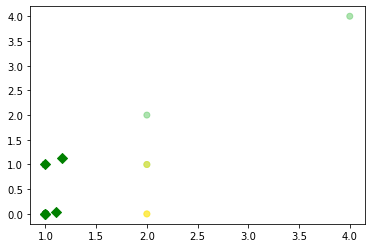

In [43]:
## 클러스터링 결과를 시각화해서 확인해보기
centers = pd.DataFrame(model.cluster_centers_, columns=['action', 'adventure', 'animation', 'crime', 'drama', 'family', 'history', 'mystery','romance','sci_fi', 'thriller', 'war', 'western'])
center_x = centers['action']
center_y = centers['adventure']
 
#scatter plot
plt.scatter(r['action'], r['adventure'], c=r['predict'], alpha=0.5)
plt.scatter(center_x, center_y, s=50, marker='D', c='g')
plt.show()


In [77]:
data

,actor,movie,action,adventure,animation,crime,drama,family,history,mystery,romance,sci_fi,thriller,war,western
0,AdamWilliams,north-by-northwest,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,CaryGrant,north-by-northwest,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,EdwardPlatt,north-by-northwest,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,EvaMarieSaint,north-by-northwest,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,JamesMason,north-by-northwest,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,HarrisonFord,the-fugitive,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
167,TommyLeeJones,the-fugitive,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
168,GertFröbe,goldfinger,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
169,HonorBlackman,goldfinger,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [92]:
## t-SNE 를 통한 시각화

#!pip install altair

from sklearn.manifold import TSNE
import altair as alt


data_matrix = merge_KMeans_actor.iloc[:, 1:14].values
data_tsne_result = TSNE(learning_rate=300, init='pca').fit_transform(data_matrix)

df_data_tsne_result = (pd.DataFrame(data_tsne_result, columns=['V1', 'V2']).assign(predict = merge_KMeans_actor['predict']))

In [97]:
(df_data_tsne_result.pipe(alt.Chart, width=800, height=400).mark_point().encode(x='V1:Q', y='V2:Q', color='predict:N') )

alt.Chart(...)

In [ ]:
## t-SNE 연습

#!pip install altair

from sklearn.manifold import TSNE
import altair as alt


data_matrix = data.iloc[:, 2:13].values
data_tsne_result = TSNE(learning_rate=300, init='pca').fit_transform(data_matrix)

df_data_tsne_result = (pd.DataFrame(data_tsne_result, columns=['V1', 'V2']).assign(species = data['actor']))

In [ ]:
## 

import matplotlib
import matplotlib.pyplot as plt

# matplotlib 설정
matplotlib.rc('font', family='AppleGothic') # 한글 출력
plt.rcParams['axes.unicode_minus'] = False # 축 - 설정

